In [1]:
import pandas as pd
import numpy as np

# read in data and show first rows
trainoutliers = pd.read_csv("originaltrain.csv")
trainoutliers.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [2]:
# describe the data with basic statistics
trainoutliers.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [3]:
# check for null values
trainoutliers.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

In [4]:
# use pandas profiling for basic statistics, correlations, and other basic metrics
from pandas_profiling import ProfileReport
profile = ProfileReport(trainoutliers)
profile.to_file(output_file = "indivfeature.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

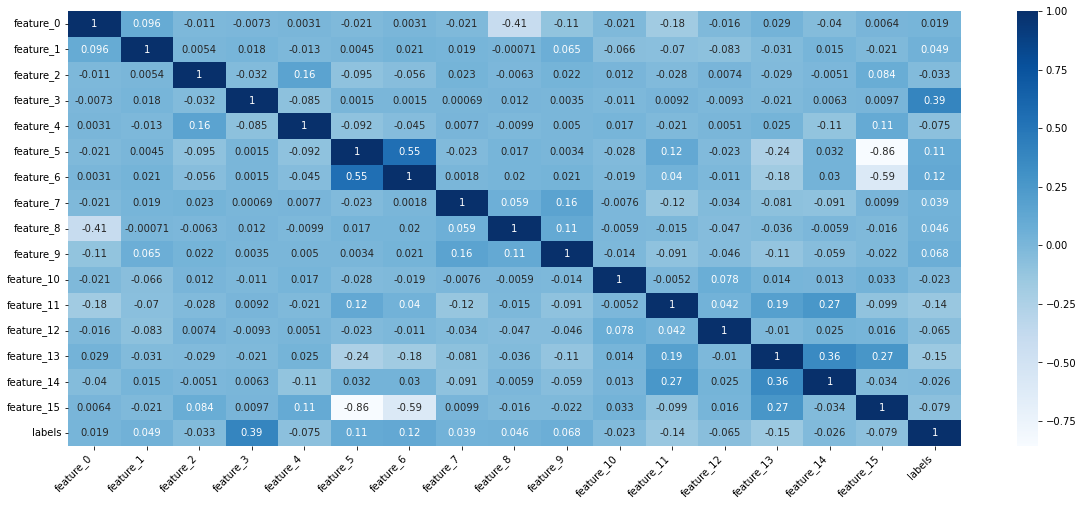

In [5]:
# correlation chart to understand most influential features

import sklearn.datasets 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.figure(figsize=(20,8))
corr = trainoutliers.corr()
ax = sns.heatmap(
    corr, annot=True, cmap=plt.cm.Blues 
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Dropping features

In [6]:
# dropping features that will no longer be used due to correlation issues
trainoutliers.drop('feature_5', inplace=True, axis=1)
trainoutliers.drop('feature_6', inplace=True, axis=1)
trainoutliers.drop('feature_7', inplace=True, axis=1)
trainoutliers.drop('feature_14', inplace=True, axis=1)

# verifying features were dropped
trainoutliers.columns


Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_15', 'labels'],
      dtype='object')

### Picking features to keep for model

In [8]:
# using ANOVA method to determine top features to keep

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

 
X = trainoutliers
y=trainoutliers["labels"]
test=SelectKBest(score_func=f_classif, k=6)
fit = test.fit(X,y)
set_printoptions(precision=10)

features = fit.transform(X)
ANOVA_features_for_training = test.fit_transform(X,y)
ANOVA_support = test.get_support()
ANOVA_feature = X.loc[:,ANOVA_support].columns.tolist()
print("The Dataset features are: ", X.shape[1])
print('The selected features with ANOVA(Filter Method are', len(ANOVA_feature))
print("They are: ")
print(ANOVA_feature)

The Dataset features are:  13
The selected features with ANOVA(Filter Method are 6
They are: 
['feature_3', 'feature_4', 'feature_11', 'feature_13', 'feature_15', 'labels']


C:\Users\13158\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\13158\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


[0.0117614626 0.0200839389 0.00475995   0.0697107343 0.0035979882
 0.0063545747 0.0059811113 0.0007484207 0.0098382006 0.
 0.0182833291 0.0358439778 0.3609791843]


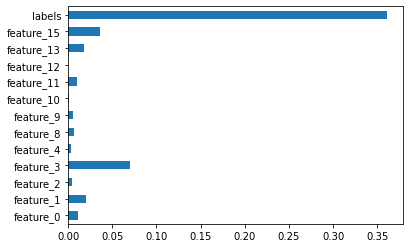

In [9]:
# verifying features to keep with mutual_info_classif
from sklearn.feature_selection import mutual_info_classif

res = mutual_info_classif(X,y)
feat_importance = pd.Series(res, trainoutliers.columns[0:len(trainoutliers.columns)])
feat_importance.plot(kind ='barh')
print(res)

### Visualization of each feature kept and churn

### Dropping remaining features

In [10]:
# verifying features were dropped
trainoutliers.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_15', 'labels'],
      dtype='object')

### Histograms of features kept

### Scatter plot of kept features 

### Creating models 



In [11]:
# splitting into train/test data

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(trainoutliers, trainoutliers['labels']):
    train_set = trainoutliers.iloc[train_indices]
    test_set = trainoutliers.iloc[test_indices]

#### Train and Evaluate Decision Tree Model

#### Train and evaluate SVC model 
    

### Train and evaluate Random Forest Model 

### Train and evaluate Logistic Regression Model 

### Train and evaluate XG boost Model 

### Train and Evaluate Gradient Boosting Classifier Feature 1

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

X = train_set[['feature_1']]
y = train_set['labels']

X_test = test_set[['feature_1']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23952     0]
 [ 3173     1]]
Accuracy is   0.8830273538302735
Precision is  0.8967104582098695
Recall is     0.8830273538302735
F1 is         0.8282111537099459

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5989    0]
 [ 793    0]]
Accuracy is   0.8830728398702448
Precision is  0.7798176405164989
Recall is     0.8830728398702448
F1 is         0.8282394860203424


C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Train and Evaluate Ada Boost

### Train and Evaluate Gradient Boosting Classifier Feature 2

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

X = train_set[['feature_2']]
y = train_set['labels']

X_test = test_set[['feature_2']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23952     0]
 [ 3174     0]]
Accuracy is   0.8829904888299049
Precision is  0.7796722033640744
Recall is     0.8829904888299049
F1 is         0.8281212337387479

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5989    0]
 [ 793    0]]
Accuracy is   0.8830728398702448
Precision is  0.7798176405164989
Recall is     0.8830728398702448
F1 is         0.8282394860203424


C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Train and Evaluate Gradient Boosting Classifier Feature 3

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

X = train_set[['feature_3']]
y = train_set['labels']

X_test = test_set[['feature_3']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23567   385]
 [ 2555   619]]
Accuracy is   0.891616898916169
Precision is  0.868765272524916
Recall is     0.891616898916169
F1 is         0.8658189352113668

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5893   96]
 [ 676  117]]
Accuracy is   0.8861692716012975
Precision is  0.856425531574965
Recall is     0.8861692716012975
F1 is         0.8559839203710516


### Train and Evaluate Gradient Boosting Classifier Feature 4

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

X = train_set[['feature_4']]
y = train_set['labels']

X_test = test_set[['feature_4']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23952     0]
 [ 3174     0]]
Accuracy is   0.8829904888299049
Precision is  0.7796722033640744
Recall is     0.8829904888299049
F1 is         0.8281212337387479

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5989    0]
 [ 793    0]]
Accuracy is   0.8830728398702448
Precision is  0.7798176405164989
Recall is     0.8830728398702448
F1 is         0.8282394860203424


C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Train and Evaluate Gradient Boosting Classifier Feature 8

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

X = train_set[['feature_8']]
y = train_set['labels']

X_test = test_set[['feature_8']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23952     0]
 [ 3174     0]]
Accuracy is   0.8829904888299049
Precision is  0.7796722033640744
Recall is     0.8829904888299049
F1 is         0.8281212337387479

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5989    0]
 [ 793    0]]
Accuracy is   0.8830728398702448
Precision is  0.7798176405164989
Recall is     0.8830728398702448
F1 is         0.8282394860203424


C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Train and Evaluate Gradient Boosting Classifier Feature 9

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

X = train_set[['feature_9']]
y = train_set['labels']

X_test = test_set[['feature_9']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23952     0]
 [ 3174     0]]
Accuracy is   0.8829904888299049
Precision is  0.7796722033640744
Recall is     0.8829904888299049
F1 is         0.8281212337387479

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5989    0]
 [ 793    0]]
Accuracy is   0.8830728398702448
Precision is  0.7798176405164989
Recall is     0.8830728398702448
F1 is         0.8282394860203424


C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Train and Evaluate Gradient Boosting Classifier Feature 10

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

X = train_set[['feature_10']]
y = train_set['labels']

X_test = test_set[['feature_10']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23952     0]
 [ 3174     0]]
Accuracy is   0.8829904888299049
Precision is  0.7796722033640744
Recall is     0.8829904888299049
F1 is         0.8281212337387479

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5989    0]
 [ 793    0]]
Accuracy is   0.8830728398702448
Precision is  0.7798176405164989
Recall is     0.8830728398702448
F1 is         0.8282394860203424


C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Train and Evaluate Gradient Boosting Classifier Feature 11

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

X = train_set[['feature_11']]
y = train_set['labels']

X_test = test_set[['feature_11']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23952     0]
 [ 3174     0]]
Accuracy is   0.8829904888299049
Precision is  0.7796722033640744
Recall is     0.8829904888299049
F1 is         0.8281212337387479

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5989    0]
 [ 793    0]]
Accuracy is   0.8830728398702448
Precision is  0.7798176405164989
Recall is     0.8830728398702448
F1 is         0.8282394860203424


C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Train and Evaluate Gradient Boosting Classifier Feature 12

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

X = train_set[['feature_12']]
y = train_set['labels']

X_test = test_set[['feature_12']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23952     0]
 [ 3174     0]]
Accuracy is   0.8829904888299049
Precision is  0.7796722033640744
Recall is     0.8829904888299049
F1 is         0.8281212337387479

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5989    0]
 [ 793    0]]
Accuracy is   0.8830728398702448
Precision is  0.7798176405164989
Recall is     0.8830728398702448
F1 is         0.8282394860203424


C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Train and Evaluate Gradient Boosting Classifier Feature 13

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

X = train_set[['feature_13']]
y = train_set['labels']

X_test = test_set[['feature_13']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23952     0]
 [ 3174     0]]
Accuracy is   0.8829904888299049
Precision is  0.7796722033640744
Recall is     0.8829904888299049
F1 is         0.8281212337387479

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5989    0]
 [ 793    0]]
Accuracy is   0.8830728398702448
Precision is  0.7798176405164989
Recall is     0.8830728398702448
F1 is         0.8282394860203424


C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13158\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Train and Evaluate Gradient Boosting Classifier Feature 15

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

X = train_set[['feature_15']]
y = train_set['labels']

X_test = test_set[['feature_15']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23654   298]
 [ 2564   610]]
Accuracy is   0.8944923689449237
Precision is  0.8752457851971626
Recall is     0.8944923689449237
F1 is         0.8675903705353263

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5899   90]
 [ 665  128]]
Accuracy is   0.8886759068121498
Precision is  0.8622630537472651
Recall is     0.8886759068121498
F1 is         0.8595681055687435


### Train and Evaluate Gradient Boosting Classifier Feature 3 and 15

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

X = train_set[['feature_3','feature_15']]
y = train_set['labels']

X_test = test_set[['feature_3','feature_15']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23407   545]
 [ 2073  1101]]
Accuracy is   0.9034874290348743
Precision is  0.8894192062056268
Recall is     0.9034874290348743
F1 is         0.8896812431476573

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5852  137]
 [ 562  231]]
Accuracy is   0.8969330580949573
Precision is  0.8790944771180303
Recall is     0.8969330580949573
F1 is         0.8798343640159495


### Train and Evaluate Gradient Boosting Classifier Feature 0

In [31]:
X = train_set[['feature_0']]
y = train_set['labels']

X_test = test_set[['feature_0']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23942    10]
 [ 3147    27]]
Accuracy is   0.883617193836172
Precision is  0.865796492632661
Recall is     0.883617193836172
F1 is         0.8303433236300408

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5984    5]
 [ 790    3]]
Accuracy is   0.8827779416101444
Precision is  0.8239344688962438
Recall is     0.8827779416101444
F1 is         0.8289425945638992


### Train and Evaluate Gradient Boosting Classifier Feature 0, 3, and 15

In [32]:
X = train_set[['feature_0','feature_3','feature_15']]
y = train_set['labels']

X_test = test_set[['feature_0','feature_3','feature_15']]
y_test = test_set['labels']


gb_model = GradientBoostingClassifier( min_samples_split = 135, n_estimators = 150, learning_rate = .05 )
gb_model.fit(X,y)

y_pred = gb_model.predict(X)
print('Results for gradient boosting on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = gb_model.predict(X_test)
print('Results for gradient boosting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for gradient boosting on training data
  Default settings
Confusion Matrix
[[23360   592]
 [ 2025  1149]]
Accuracy is   0.9035242940352429
Precision is  0.8897752414938529
Recall is     0.9035242940352429
F1 is         0.8908613115131339

Results for gradient boosting on test data
  Default settings
Confusion Matrix
[[5837  152]
 [ 537  256]]
Accuracy is   0.8984075493954585
Precision is  0.8820413305272015
Recall is     0.8984075493954585
F1 is         0.8837058576733535
